<h1 style="text-align: center; font-family: Arial, sans-serif; font-size: 36px; text-transform: uppercase; letter-spacing: 2px; background-color: #f0f0f0; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.2);">
    Code </h1> 

# Nuclear Energy 
## nuclear_energy_view.csv dataset in use 

In [31]:
#Imports
import numpy as np
#to show the dataset
import pandas as pd
#to use visual plots 
import matplotlib.pyplot as plt 

In [32]:
sample_data = pd.read_csv('nuclear_energy_view.csv')  # linking the dataset using pandas
sample_data.head()


,Year,Month,"Nuclear Generating Units, Total Operable Units","Nuclear Generating Units, Net Summer Capacity",Nuclear Electricity Net Generation,Nuclear Share of Electricity Net Generation,"Nuclear Generating Units, Capacity Factor"
0,1973,January,Not Available,14.533,6246,3.9,57.8
1,1973,February,Not Available,14.533,5928,4.1,60.7
2,1973,March,Not Available,15.314,6649,4.5,58.4
3,1973,April,Not Available,15.314,5876,4.2,53.4
4,1973,May,Not Available,16.174,5697,3.9,47.3


# Linear Regression 

In [33]:
#Imports

#Import for splitting and testing data
from sklearn.model_selection import train_test_split 
#Import for Regression model 
from sklearn.linear_model import LinearRegression 

In [34]:
# List of all columns 
print(sample_data.columns)  

Index(['Year', 'Month', 'Nuclear Generating Units, Total Operable Units',
       'Nuclear Generating Units, Net Summer Capacity',
       'Nuclear Electricity Net Generation',
       'Nuclear Share of Electricity Net Generation',
       'Nuclear Generating Units, Capacity Factor'],
      dtype='object')


In [35]:
# First value X which is matrix will be Year from the dataset columns 
X = sample_data[['Year']]

# Second value y which is vector will be NENG from the dataset columns 
y = sample_data[['Nuclear Electricity Net Generation']] 

# Splitting the the data for 20% for test and the other 80% for training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Activating the LinearRegression model import 
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Coefficient: [1198.50336267]
Intercept: [-2344795.99383187]


In [36]:
#First prediction 
y_pred = model.predict(X_test)

# Display some sample predictions
print("Predicted Values:", y_pred[:5])

Predicted Values: [[54607.73823925]
 [57004.74496459]
 [35431.68443648]
 [79776.30885538]
 [33034.67771113]]


In [37]:
print("Actual Values:", y_test[:5])

Actual Values:      Nuclear Electricity Net Generation
350                               63041
377                               67734
163                               37483
609                               61403
132                               29313


In [38]:
#finding out all the years within the dataset that the analysis can use 
print(sample_data['Year'].min(), sample_data['Year'].max())

1973 2024


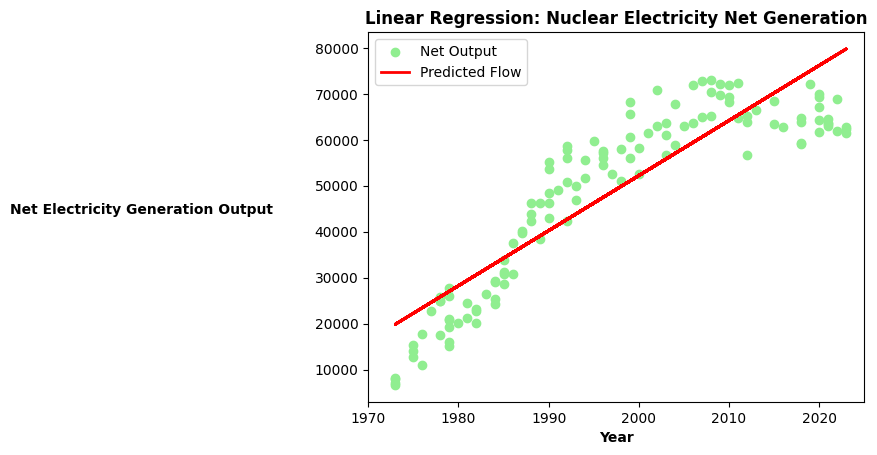

In [39]:
#Visualization using scatter model from matplot 
plt.scatter(X_test, y_test, color='lightgreen', label='Net Output', linewidth=1)
plt.plot(X_test, y_pred, color='red', label='Predicted Flow', linewidth=2)
plt.title('Linear Regression: Nuclear Electricity Net Generation', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Net Electricity Generation Output', rotation=0, labelpad=30, ha='right', fontweight='bold')
plt.legend()

# Year set 
plt.xlim(1970, 2025)

plt.show()


# K Nearest Neighbour 

In [40]:
#Import KNR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [41]:
#Converting months to numerical values for model to work 
month_mapping = {
     'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

sample_data['Month'] = sample_data['Month'].map(month_mapping)

In [42]:
# Value x will use Year and Month which is why the months got converted to numerical 
x = sample_data[['Year', 'Month']]

# Y is 
y = sample_data[['Nuclear Electricity Net Generation']]

#Train test split 0.2 which means 20% of the data will be allocated to the test set while the other 80% for training 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
print(sample_data.isnull().sum())
sample_data = sample_data.dropna()

Year                                              0
Month                                             0
Nuclear Generating Units, Total Operable Units    0
Nuclear Generating Units, Net Summer Capacity     0
Nuclear Electricity Net Generation                0
Nuclear Share of Electricity Net Generation       0
Nuclear Generating Units, Capacity Factor         0
dtype: int64


In [44]:
sample_data = sample_data.dropna(subset=['Month'])

In [45]:
k = 5  
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the model on the training data
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

In [46]:
y_pred = knn_model.predict(X_test) 

In [47]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 17812178.987967484
R^2 Score: 0.9532765551186135


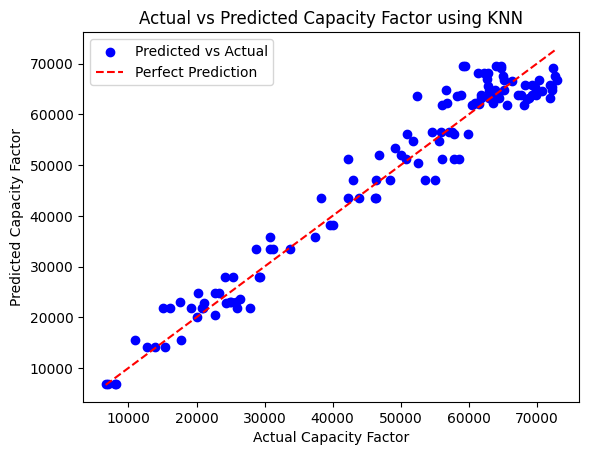

In [53]:
# Scatter plot: Actual vs Predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Line representing perfect predictions (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Capacity Factor')
plt.ylabel('Predicted Capacity Factor')
plt.title('Actual vs Predicted Capacity Factor using KNN')
plt.legend()

plt.show()